<a href="https://colab.research.google.com/github/naruminho/rainmodel/blob/master/nana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conteúdo

1. [Método de PULS](#puls) 
2. [Montando o google drive](#drive)
3. [Settings](#settings)

# 1. Método de PULS <a id="puls"></a>
 
 Vamos simular a propagação com três equações:
 
 Continuidade: 
 $\frac{dS}{dt}=I-Q$
 
 $Q_{t+1}+\frac{2S_{t+1}}{\Delta t} = I_t - I_{t+1} - Q_t + \frac{2S_{t}}{\Delta t}$

Função de armazenamento: $S=F(Q)$

Equação do controle hidráulico: $Q=F(H)$

#2. Montando o google drive <a id="drive"></a>
1. Executar a célula com o código from..
2. Entrar no link
3. Copiar o código
4. Colar no campo
5. Dar `ENTER`

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


<a id="settings"></a>
# 3. Settings 

Aqui vamos definir nossas variáveis. As constantes para São Carlos foram obtidas no trabalho do [Barbassa](www.google.com)

`shift + enter ` para executar a célula

In [0]:
arquivo_vazao = 'gdrive/My Drive/src/puls/vazao.xlsx'

In [0]:
# constantes para são carlos
k = 25.33 # p/min
m = 0.236
T0 = 16
n = 0.935
k = k * 60 #p/ passar por hora. Ps. O valor de k novo vai ser multiplicado pelo valor de k antigo. Se for na mesma célula ok, se for em célula diferente vai ficar atualizando infinito
print('valor de k:', k) #entre aspas ele da o texto literal que está escrito entre as aspas
tc = 5 #min

# tem que por pra rodar todo mundo

valor de k: 1519.8


In [0]:
TR = 5
d = 30 #min
i = k * (TR**m) / ((d+T0)**n) #mm/h     elevado é **
P = i * d/60 #mm
print('valor de i:', i)
print('valor de P', P)

valor de i: 61.95334909375189
valor de P 30.976674546875945


In [0]:
Abase = 6 #m2
C = 0.95 
A = 94 #m2
Qmax = C*i*A/(1000*3600) #m3/s
print('valor de Qmax', Qmax)

valor de Qmax 0.0015367872427977899


Tem um jeito mais elegante para renomear as colunas:
Ao invés de:


```
df = df.rename(columns={'t (min)': 't', 'Q (m³/s)': 'Q' })
```


Pode ser:
```
df.columns = ['t', 'Q']
```

No jeito 1, podemos renomear somente as colunas que quisermos e na ordem que quisermos. Do jeito 2, é preciso colocar o nome de todas as colunas e na ordem correta, mesmo se elas não forem renomeadas. Em tabelas com muitas colunas, o jeito 1 é mais indicado.

In [0]:
import pandas as pd #pandas é uma biblioteca de matriz/data frames
#pd.read_excel(arquivo_vazao) #aqui apenas leu o arquivo de vazão
df = pd.read_excel(arquivo_vazao)
df = df.rename(columns={'t (min)': 't', 'Q (m³/s)': 'Q' })
df.head(3) #mostra só as primeiras n linhas dentro dos parentes

,t,Q
0,0,0.000
1,5,0.015
2,10,0.015


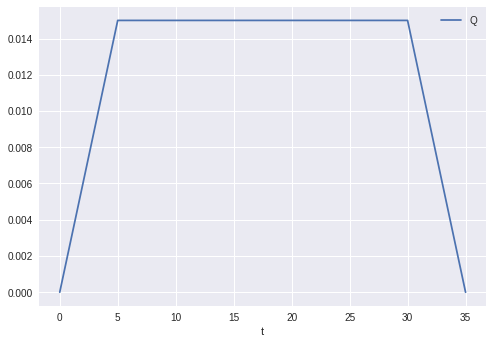

In [0]:
import matplotlib.pyplot as plt
ax = plt.gca() #get current axis, sempre tem que por isso
df.plot(kind='line', x='t', y = 'Q', ax=ax) #plotar gráfico de df, do tipo linha, que x é tals e y é tals


In [0]:
df['vol'] = df['t'] * df['Q']*60
df.head()

,t,Q,vol
0,0,0.000,0.0
1,5,0.015,4.5
2,10,0.015,9.0
3,15,0.015,13.5
4,20,0.015,18.0


In [0]:
import numpy as np #biblioteca de vetor

In [0]:
t_ini = 0
n = d + tc + 1
deltat = 1
t = np.arange(t_ini,n,deltat)
Hidr = pd.DataFrame({'t': t})
Hidr.head(3)  # narumi: aqui vc pode usar Hidr.head() ou Hidr.tail()  tail mostra os n ultimos

,t
0,0
1,1
2,2


In [0]:
m = Qmax/tc
Hidr.loc[Hidr['t'] < d, 'q1'] = Qmax + m * Hidr['t'] - m*tc #localiza os números que atendem a condição colocada na coluna 't', colocando em uma nova coluna q1, retornando o valor que está depois do =
Hidr.loc[Hidr['t'] > d, 'q1'] = Qmax - m * Hidr['t'] + m*d
Hidr.loc[(Hidr['t'] >= tc) & (Hidr['t'] <= d), 'q1'] = Qmax
Hidr.head(3)

,t,q1
0,0,2.168404e-19
1,1,3.073574e-04
2,2,6.147149e-04


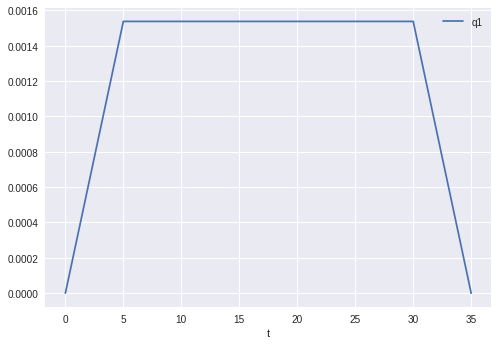

In [0]:
ax = plt.gca() #get current axis, sempre tem que por isso
Hidr.plot(kind='line', x='t', y = 'q1', ax=ax) #plotar gráfico de df, do tipo linha, que x é tals e y é tals


 $f(h)=k A_{base} \frac { (\psi + L + h)}{L}$
  
$ Q_v(h)=
    \begin{cases}
      1.4  (h - P)^{2.5}, & \text{if}\ h > P \\
      0, & \text{otherwise}
    \end{cases}
 $
 
 $S(h) = A_{base} h $


In [0]:
psi = 0.049
L = 2 #2 para solo saturado (m)
k = 8.e-4 #(m/s)
P = 0.6 #(m)
dt = 60 #(s) ou 1min

In [0]:
n_0 = 0
nf = 1.001
deltah = 0.001
h = np.arange(n_0, nf, deltah) #h (m)
aux = pd.DataFrame({'h': h})
aux.tail(2)  # narumi: aqui vc pode usar Hidr.head() ou Hidr.tail()  tail mostra os n ultimos

,h
999,0.999
1000,1.000


In [0]:
aux['S(h)'] = Abase * aux['h']
aux['f(h)'] = (k * Abase * (psi + L + aux['h']))/L
aux.loc[aux['h'] > P, 'Qv(h)'] = 1.4 * (aux['h']-P)**(2.5)
aux.loc[aux['h'] <= P, 'Qv(h)'] = 0
aux['O(h)'] = aux['f(h)'] + aux['Qv(h)']
aux['A'] = aux['S(h)'] + 0.5*aux['O(h)']*dt
aux.head(3)

,h,S(h),f(h),Qv(h),O(h),A
0,0.000,0.000,0.004918,0.0,0.004918,0.147528
1,0.001,0.006,0.004920,0.0,0.004920,0.153600
2,0.002,0.012,0.004922,0.0,0.004922,0.159672


In [0]:
t_0 = 0
t_f = 121
deltat = 1
t = np.arange(t_0, t_f, deltat) #t (min)
puls = pd.DataFrame({'t': t})

puls.tail(2)

,t
119,119
120,120


In [0]:
puls['I(t)']=Hidr['q1']
puls = puls.fillna(0)
puls['h(t)'] = 0
puls['S(t)'] = 0
puls['f(t)'] = 0
puls['Qv(t)'] = 0
puls['O(t)'] = 0
puls.head()

,t,I(t),h(t),S(t),f(t),Qv(t),O(t)
0,0,2.168404e-19,0,0,0,0,0
1,1,3.073574e-04,0,0,0,0,0
2,2,6.147149e-04,0,0,0,0,0
3,3,9.220723e-04,0,0,0,0,0
4,4,1.229430e-03,0,0,0,0,0


#Sandbox


In [0]:
!ls #mostra as pastas

gdrive	sample_data


In [0]:
!ls gdrive

'My Drive'  'Team Drives'


In [0]:
!ls gdrive/'My Drive'/src/puls # quando tem espaço tem que por entre aspas

puls


In [0]:
import numpy as np #biblioteca de vetor

In [0]:
t_ini = 0
n = d + tc + 1
deltat = 1
t = np.arange(t_ini,n,deltat) #cria um intervalo com n - 1 numeros. O primeiro número é onde começa, o segundo é onde termina e o terceiro é o espaçamento

In [0]:
lala = pd.DataFrame({'t': t})

In [0]:
lala['nova'] = lala['t']*2

In [0]:
lala

,t,nova
0,0,0
1,5,10
2,10,20
3,15,30
4,20,40
5,25,50
6,30,60
7,35,70


In [0]:
lala['t'][1]

5

In [0]:
lala['t'][2:5]

2    10
3    15
4    20
Name: t, dtype: int64